In [1]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 1.9MB/s 
    100% |████████████████████████████████| 1.4MB 15.4MB/s 
    100% |████████████████████████████████| 133kB 26.0MB/s 
    100% |████████████████████████████████| 61kB 26.4MB/s 
    100% |████████████████████████████████| 4.7MB 7.3MB/s 
    100% |████████████████████████████████| 552kB 25.6MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [0]:
import pandas as pd
import numpy as np
from gensim import corpora


train = pd.read_csv('train.csv', header=None)
test = pd.read_csv('test.csv', header=None)

train_data = train[list(range(50))].as_matrix()
test_data = test[list(range(50))].as_matrix()
train_labels = train[50].as_matrix()
test_labels = test[50].as_matrix()


In [3]:

print(train_data[10], train_labels[10])
print(train_data[13], train_labels[13])


[56651    16 13728 39179    16  3686    22  2116    10 18765     1   282
  3859 35158   523   283    17  5423    16 55954   282  3859 66277  4149
   283    15  8759    10   394     1   282 67648    16 28520   283  5640
    17  1643   153    22   963    14     1  4638    16  1385    16 25363
  1495 21386] 2
[  522    17   914  8524    16  4916    11     0  6609    16  6327   787
   909   529   193   483     0    75  1007    22 11996  1503    10  9038
   112  7218    22    89  9944    17   101    89  3850    11   302     8
     1   832  5584  8801    16  7858    15    74     8   154    16    20
    15     0] 0


In [0]:
dictionary = corpora.Dictionary.load_from_text('bungo_dict.txt').token2id

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import LSTM

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Embedding(90000, 300, input_length=50))
model.add(LSTM(32))
model.add(Dense(4, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_train = train_data
x_test = test_data

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 17s 340us/step - loss: 0.8073 - acc: 0.6689 - val_loss: 0.4459 - val_acc: 0.8553
Epoch 2/4
50000/50000 [==============================] - 14s 284us/step - loss: 0.2717 - acc: 0.9309 - val_loss: 0.2505 - val_acc: 0.9224
Epoch 3/4
50000/50000 [==============================] - 14s 286us/step - loss: 0.1124 - acc: 0.9682 - val_loss: 0.2413 - val_acc: 0.9210
Epoch 4/4
50000/50000 [==============================] - 15s 292us/step - loss: 0.0599 - acc: 0.9828 - val_loss: 0.2390 - val_acc: 0.9305


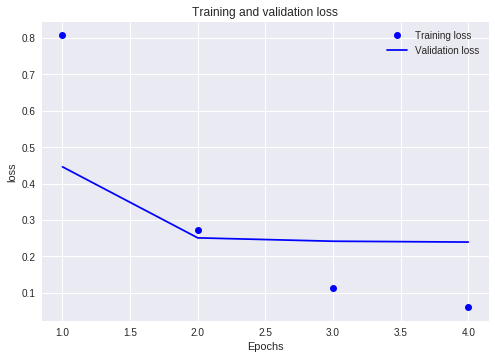

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

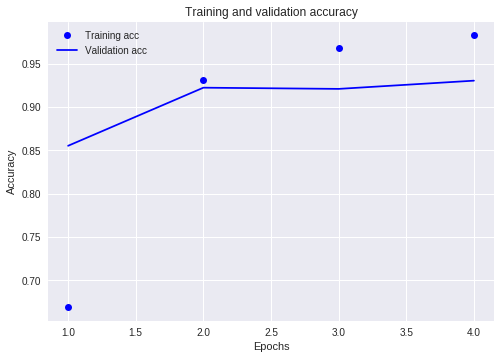

In [11]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model.save('pre_trained_model.h5')

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 300)           27000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 27,042,756
Trainable params: 27,042,756
Non-trainable params: 0
_________________________________________________________________


In [14]:
results = model.evaluate(x_test, one_hot_test_labels)

10000/10000 [==============================] - 10s 971us/step


In [15]:
results

[0.23718299508541824, 0.9298]

In [0]:
predictions = model.predict(x_test)

In [17]:
predictions

array([[2.0136279e-03, 3.4195390e-03, 9.9395329e-01, 6.1350741e-04],
       [9.9795938e-01, 8.8385626e-04, 8.0165797e-04, 3.5518932e-04],
       [4.4839429e-03, 9.8748279e-01, 5.5739800e-03, 2.4592828e-03],
       ...,
       [9.9867898e-01, 5.7151390e-04, 5.9649342e-04, 1.5295131e-04],
       [3.2193169e-03, 9.9227411e-01, 3.0609681e-03, 1.4455955e-03],
       [3.3719934e-04, 8.5455395e-05, 5.8438553e-04, 9.9899298e-01]],
      dtype=float32)